# 推定と検定

- 推定
- 検定

このテキストは「谷合廣紀著: Pythonで理解する統計解析の基礎」を参考にしています。

In [ ]:
# 必要なimport
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [ ]:
# notebookの設定
%load_ext google.colab.data_table
%precision 3
pd.options.display.precision = 3

架空のデータの作成

In [ ]:
# random seed の指定
np.random.seed(3)
# 300人分のテストのデータ（仮想的な母集団）の生成
all_scores = np.random.normal(60, 10, size=300)

(array([ 4.,  6., 20., 48., 68., 60., 48., 23., 18.,  5.]),
 array([30.843, 36.57 , 42.298, 48.025, 53.753, 59.481, 65.208, 70.936,
        76.664, 82.391, 88.119]),
 <BarContainer object of 10 artists>)

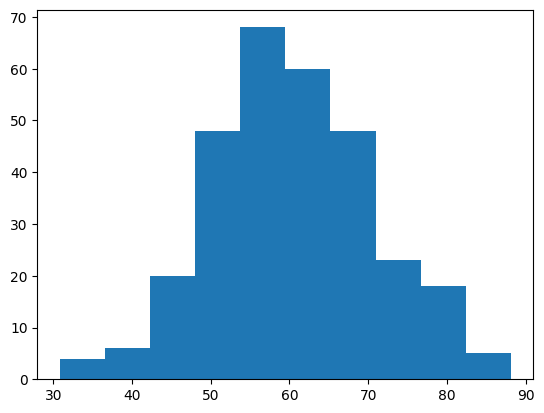

In [ ]:
# ヒストグラムの表示
counts, bins = np.histogram(all_scores)
plt.hist(bins[:-1], bins, weights=counts)

In [ ]:
# 母平均と母分散
print(f'Mean: {np.mean(all_scores):.5}')
print(f'Var : {np.var(all_scores):.5}')

Mean: 60.485
Var : 104.52


In [ ]:
# 20人分のサンプルを10000組作成
n = 20
n_samples = 10000
samples = np.random.choice(all_scores, (n_samples, n))
samples.shape

(10000, 20)

## 推定


### 点推定

In [ ]:
# 少数のセットで平均の推定値を確認
for i in range(5):
  print(f'{np.mean(samples[i]):.5}')

62.937
56.156
62.79
60.0
62.404


In [ ]:
# 全セットの標本平均
sample_means = np.mean(samples, axis=1)
print(f'{np.mean(sample_means):.5}')

60.505


In [ ]:
# 少数のセットで分散の推定値を確認
for i in range(5):
  print(f'{np.var(samples[i]):.5}')

102.62
96.37
80.561
91.41
121.61


In [ ]:
# 全セットの標本分散
sample_vars = np.var(samples, axis=1)
print(f'{np.mean(sample_vars):.5}')

99.282


In [ ]:
# 全セットの不偏分散
sample_vars = np.var(samples, axis=1, ddof=1)
print(f'{np.mean(sample_vars):.5}')

104.51


### 区間推定

In [ ]:
# 20人分のサンプルから平均を区間推定
n = 20
s_mean = np.mean(np.random.choice(all_scores, n))
# 母分散
p_var = np.var(all_scores)
# 区間推定
rv = stats.norm()
lcl = s_mean - rv.isf(0.025) * np.sqrt(p_var/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(p_var/n)
print(f'[{lcl:.5} , {ucl:.5}]')

[53.65 , 62.611]


In [ ]:
# 20人分のサンプルから分散を区間推定
n = 20
u_var = np.var(np.random.choice(all_scores, n), ddof=1)

# 区間推定による分散
rv = stats.chi2(df=n-1)
lcl = (n-1) *  u_var / rv.isf(0.025)
ucl = (n-1) *  u_var / rv.isf(0.975)
print(f'[{lcl:.5} , {ucl:.5}]')

[70.61 , 260.45]


In [ ]:
# 20人分のサンプルから母分散未知で平均値を区間推定
n = 20
scores = np.random.choice(all_scores, n)
s_mean = np.mean(scores)
s_var = np.var(scores, ddof=1)

# 区間推定
rv = stats.t(df=n-1)
lcl = s_mean - rv.isf(0.025) * np.sqrt(s_var/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(s_var/n)
print(f'[{lcl:.5} , {ucl:.5}]')

[57.227 , 63.156]


## 検定

例題：公称95%の正解率で手書き文字を判別できるというソフトを使って、15人の被験者の正解率を平均したところ 87.6% であった。このような実験結果は偶然に起こりえることかどうか検定を行いたい。

In [ ]:
# 例題のデータを生成
np.random.seed(20)
scores = np.random.normal(0.9, 0.1, size=15)
scores

array([0.988, 0.92 , 0.936, 0.666, 0.792, 0.956, 0.994, 0.802, 0.95 ,
       0.941, 0.932, 0.851, 0.821, 0.816, 0.772])

In [ ]:
# 平均
np.mean(scores)

0.875703725367657

In [ ]:
rv = stats.norm(0.95, np.sqrt(0.01/15))
rv.isf(0.95)

0.9075300619724538

In [ ]:
t, p = stats.ttest_1samp(scores, 0.95)
t, p

(-3.030321734488883, 0.008994174160339931)

## 練習問題



### 練習問題4-1

大数の法則を確認するシミュレーションプログラムを書いてください。


### 練習問題4-2

中心極限定理を確認するシミュレーションプログラムを書いてください。

### 練習問題4-3

分散の点推定において、サンプル数が大きいときの標本分散と不偏分散の推定値を比較してください。


### 解答例

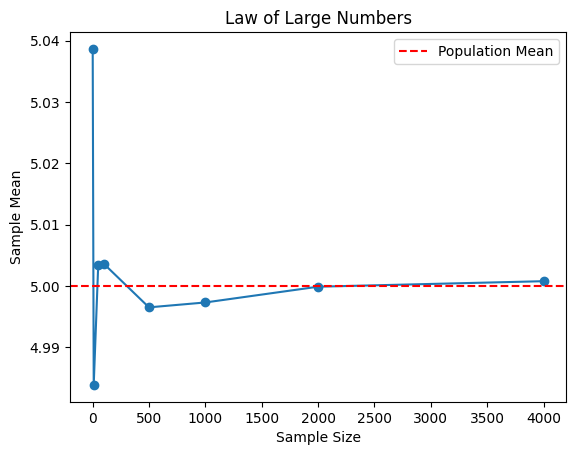

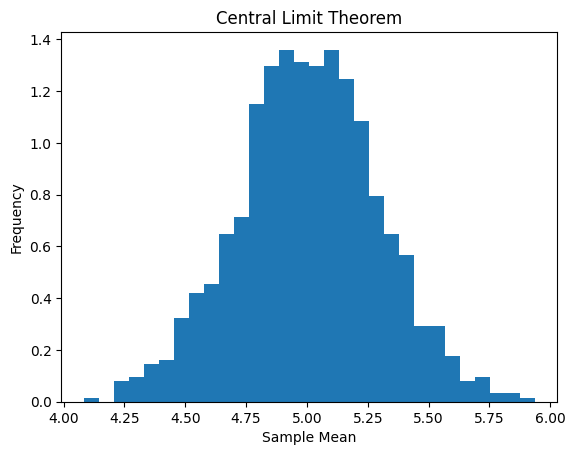

In [ ]:
# 大数の法則と中心極限定理が成り立つことの検証

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Population parameters
population_mean = 5
population_std = 2

# Sample sizes
sample_sizes = [1, 10, 50, 100, 500, 1000, 2000, 4000]

# Number of experiments
num_experiments = 1000

# Law of Large Numbers
lln_means = []

for n in sample_sizes:
    sample_means = [np.mean(np.random.normal(population_mean, population_std, n)) for _ in range(num_experiments)]
    lln_means.append(np.mean(sample_means))

plt.plot(sample_sizes, lln_means, marker='o')
plt.axhline(population_mean, color='r', linestyle='--', label='Population Mean')
plt.xlabel('Sample Size')
plt.ylabel('Sample Mean')
plt.legend()
plt.title('Law of Large Numbers')
plt.show()

# Central Limit Theorem
sample_size_for_clt = 50

sample_means_for_clt = [np.mean(np.random.normal(population_mean, population_std, sample_size_for_clt)) for _ in range(num_experiments)]

plt.hist(sample_means_for_clt, bins=30, density=True)
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.title('Central Limit Theorem')
plt.show()


In [ ]:
# 標本分散と不偏分散の平均の差

# random seed の指定
np.random.seed(3)
# 300人分のテストのデータ（仮想的な母集団）の生成
all_scores = np.random.normal(60, 10, size=300)

# 100人分のサンプルを10000組作成
n = 100
n_samples = 10000
samples = np.random.choice(all_scores, (n_samples, n))

# 全セットの標本分散
sample_vars = np.var(samples, axis=1)
print(f'{np.mean(sample_vars):.5}')

# 全セットの不偏分散
sample_vars = np.var(samples, axis=1, ddof=1)
print(f'{np.mean(sample_vars):.5}')

103.58
104.63
